In [19]:
%cd video-classification-3d-cnn-pytorch/

C:\Users\ASUS\Desktop\rc11\SKILL COURSE\class1\video-classification-3d-cnn-pytorch\video-classification-3d-cnn-pytorch


In [20]:
!pip install --upgrade moviepy
!git clone https://github.com/kenshohara/video-classification-3d-cnn-pytorch.git
!pip install torch torchvision torchaudio

Cloning into 'video-classification-3d-cnn-pytorch'...


In [21]:
import json
import os
from moviepy.editor import *
from moviepy import *

In [22]:
%cd C:\Users\ASUS\Desktop\rc11\SKILL COURSE\class1\video-classification-3d-cnn-pytorch\

C:\Users\ASUS\Desktop\rc11\SKILL COURSE\class1\video-classification-3d-cnn-pytorch


In [25]:
def loadVideosToInfile1(folder):
    videos = os.listdir(folder)
    with open('output1', 'w') as inputfile:
        for v in videos:
            if v.split('.')[-1] == 'mp4':
                inputfile.write(v+'\n')
loadVideosToInfile1('../input_films1')

In [26]:
def loadVideosToInfile2(folder):
    videos = os.listdir(folder)
    with open('output2', 'w') as inputfile:
        for v in videos:
            if v.split('.')[-1] == 'mp4':
                inputfile.write(v+'\n')
loadVideosToInfile2('../input_films2')


In [28]:
!python main.py --input output1 --video_root ../input_films1 --output ../output_features1.json --model resnet-34-kinetics-cpu.pth --mode feature --no_cuda

loading model resnet-34-kinetics-cpu.pth
../input_films1\blimey-that-quick-i-can-hear-a-plane-already.mp4


ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.1 (GCC) 20200726
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libsrt --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libgsm --enable-librav1e --disable-w32threads --enable-libmfx --enable-ffnvcodec --enable-cuda-llvm --enable-cuvid --enable-d3d11va 

In [29]:
!python main.py --input output2 --video_root ../input_films2 --output ../output_features2.json --model resnet-34-kinetics-cpu.pth --mode feature --no_cuda

loading model resnet-34-kinetics-cpu.pth
../input_films2\and-so-years-st-patricks-day-parade-continues-on-schedule.mp4
../input_films2\anyone-got-anything-theyd-rather-be-doing-s1.mp4
../input_films2\oh-god-s87.mp4
../input_films2\the-ary-ary-ary-ary-aryan.mp4
../input_films2\the-ease-dispatch-he-hands-out-the-marching-orders.mp4


ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.1 (GCC) 20200726
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libsrt --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libgsm --enable-librav1e --disable-w32threads --enable-libmfx --enable-ffnvcodec --enable-cuda-llvm --enable-cuvid --enable-d3d11va 

In [31]:
file = open('../output_features2.json')
segments = json.load(file)
len(segments)
     

5

In [32]:
for s in segments: print(s['video'])

and-so-years-st-patricks-day-parade-continues-on-schedule.mp4
anyone-got-anything-theyd-rather-be-doing-s1.mp4
oh-god-s87.mp4
the-ary-ary-ary-ary-aryan.mp4
the-ease-dispatch-he-hands-out-the-marching-orders.mp4


In [34]:
print(segments[0]['clips'][0].keys())

dict_keys(['segment', 'features'])


In [35]:
import numpy as np
import json

In [36]:
file1 = open('C:\\Users\\ASUS\\Desktop\\rc11\\SKILL COURSE\\class1\\output_features1.json')
segments1 = json.load(file1)
file2 = open('C:\\Users\\ASUS\\Desktop\\rc11\\SKILL COURSE\\class1\\output_features2.json')
segments2 = json.load(file2)

film1Features = []
for s in segments1[0]['clips']:
    film1Features.append(np.array(s['features']))

In [37]:
def find_best_range(films, sample_film_features):
    best_range_info = {
        'start': 0,
        'score': 100000000,
        'filmX_index': -1  
    }

    for filmX_index, filmX in enumerate(films):
        filmX_features = []
        for s in filmX['clips']:
            filmX_features.append(np.array(s['features']))

        for i in range(len(filmX_features) - len(sample_film_features)):
            distance = 0
            for j in range(len(sample_film_features)):
                d = np.linalg.norm(filmX_features[i + j] - sample_film_features[j])
                distance += d

            if distance < best_range_info['score']:
                best_range_info['start'] = i
                best_range_info['score'] = distance
                best_range_info['filmX_index'] = filmX_index

    return best_range_info

best_range_info = find_best_range(segments2, film1Features)
print(f"Best Range Start: {best_range_info['start']}")
print(f"Best Range Score: {best_range_info['score']}")
print(f"Best Range belongs to Film Index: {best_range_info['filmX_index']}")

Best Range Start: 0
Best Range Score: 124.75618209784992
Best Range belongs to Film Index: 0


In [40]:
from IPython.display import Video

def exportXVideo(XVideo, Samfeatures, best_range_info):
    tsfps = XVideo.fps
    tsFrameLength = 1 / tsfps
    nrFrames = len(Samfeatures) * 16
    startFrame = best_range_info['start'] * 16
    startTime = startFrame * tsFrameLength
    endTime = startTime + nrFrames * tsFrameLength
    try:
        X_Matched_sample_Video = XVideo.subclip(startTime, endTime)
        X_Matched_sample_Video.ipython_display()
        X_Matched_sample_Video.write_videofile("C:\\Users\\ASUS\\Desktop\\rc11\\SKILL COURSE\\class1\\input_films1\\blimey-that-quick-i-can-hear-a-plane-already.mp4", audio_codec='aac')
    except Exception as e:
        print(f"Fail: {e}")
    return X_Matched_sample_Video

XVideo = VideoFileClip(r"C:\\Users\\ASUS\\Desktop\\rc11\\SKILL COURSE\\class1\\input_films2\\and-so-years-st-patricks-day-parade-continues-on-schedule.mp4")
Samfeatures = film1Features
best_range_info = best_range_info
X_Matched_sample_Video = exportXVideo(XVideo, Samfeatures, best_range_info)

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
Moviepy - Building video C:\Users\ASUS\Desktop\rc11\SKILL COURSE\class1\input_films1\blimey-that-quick-i-can-hear-a-plane-already.mp4.
MoviePy - Writing audio in blimey-that-quick-i-can-hear-a-plane-alreadyTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video C:\Users\ASUS\Desktop\rc11\SKILL COURSE\class1\input_films1\blimey-that-quick-i-can-hear-a-plane-already.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\ASUS\Desktop\rc11\SKILL COURSE\class1\input_films1\blimey-that-quick-i-can-hear-a-plane-already.mp4


In [41]:
X_Matched_sample_Video.duration

4.671333333333333

In [42]:
frame = X_Matched_sample_Video.get_frame(1)

In [43]:
from PIL import Image

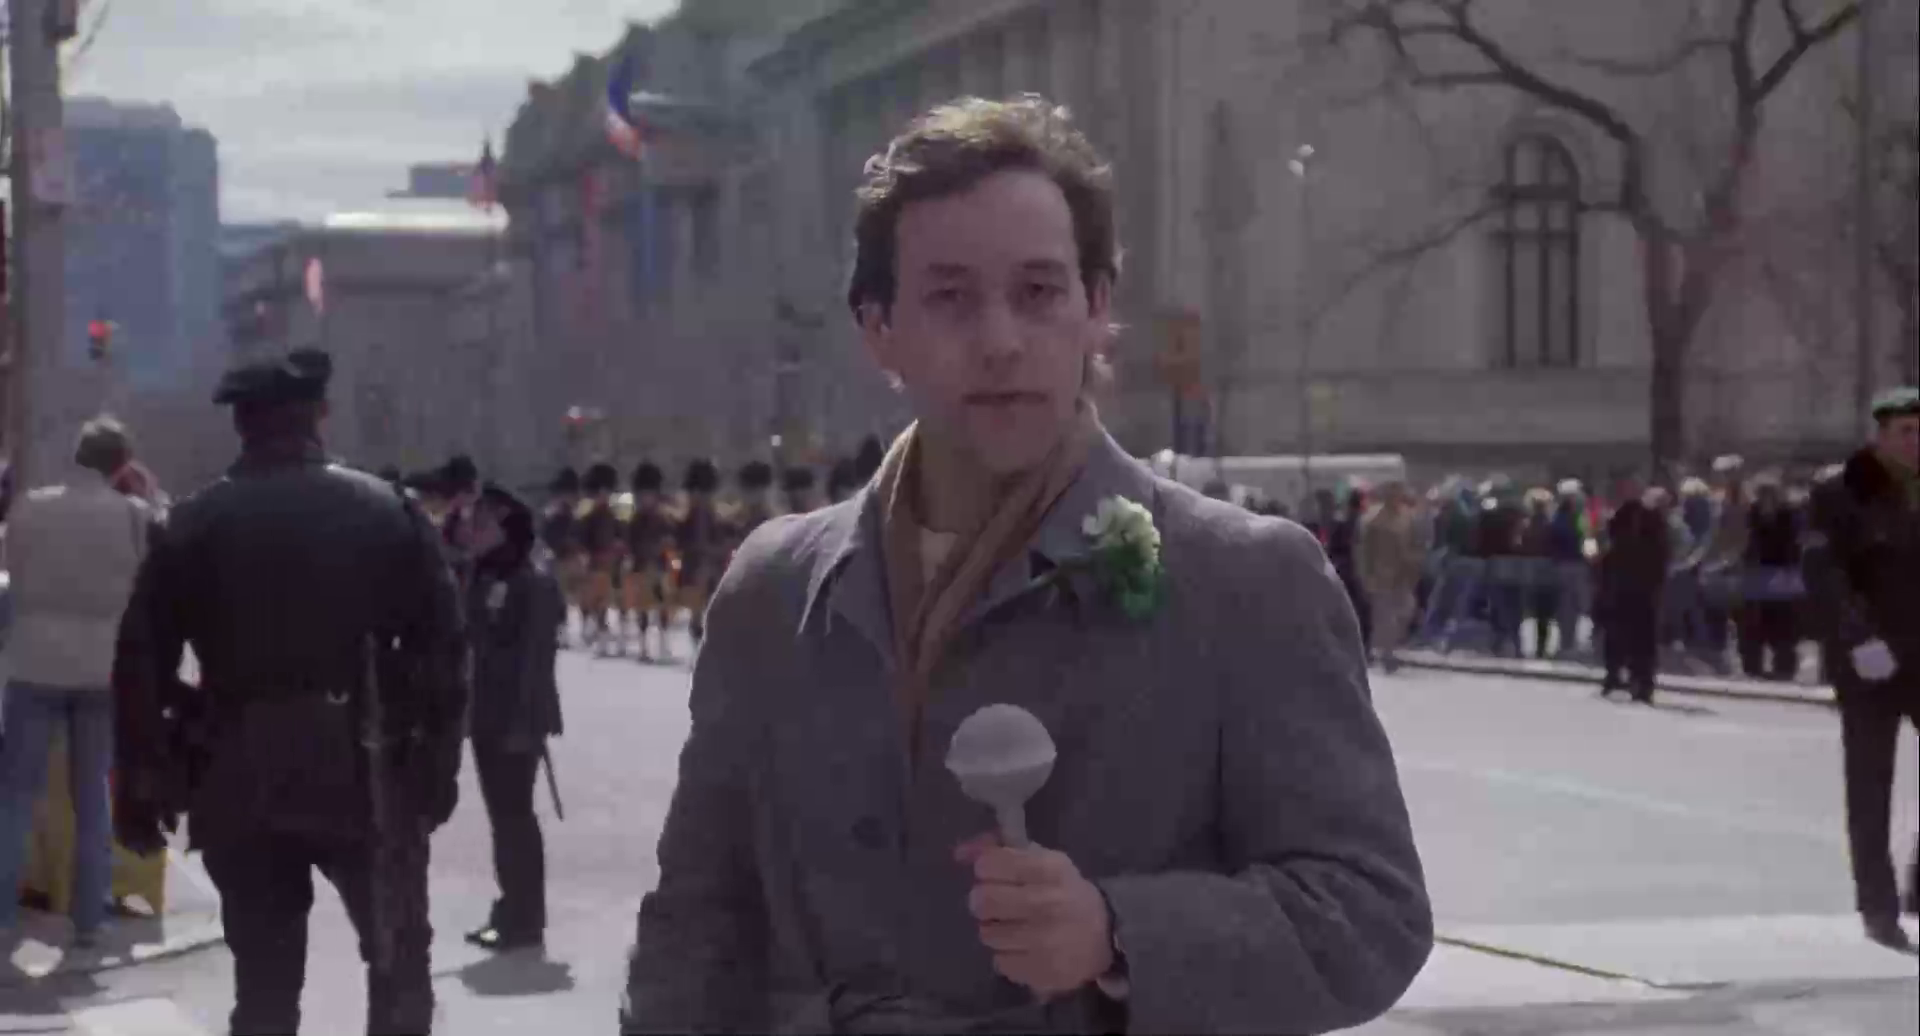

In [44]:
Image.fromarray(frame,'RGB')